In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier, VotingClassifier

In [2]:
from sklearn.metrics import classification_report, precision_recall_curve,roc_curve

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.iloc[:5]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

# Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

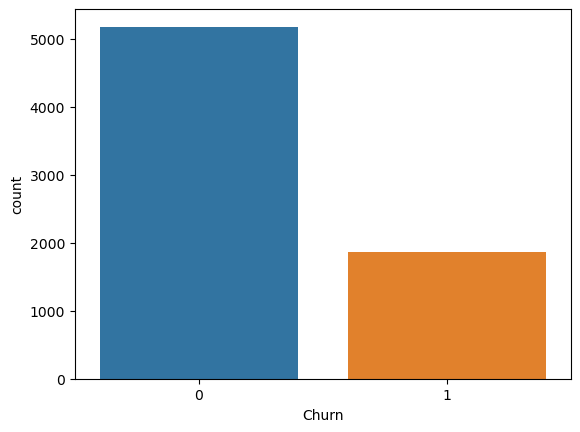

In [8]:
sns.countplot(df.Churn)

In [9]:
# data  imbalance : Anomaly detection

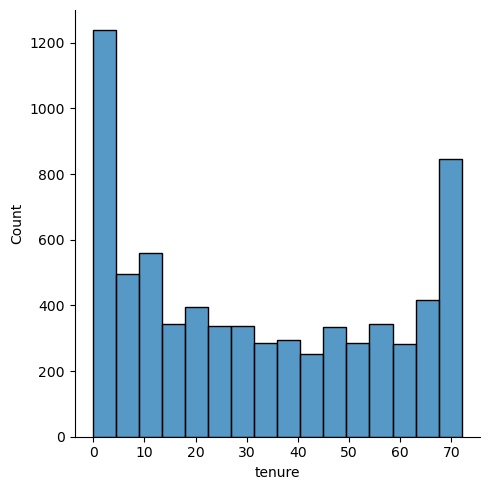

In [10]:
sns.displot(df.tenure)

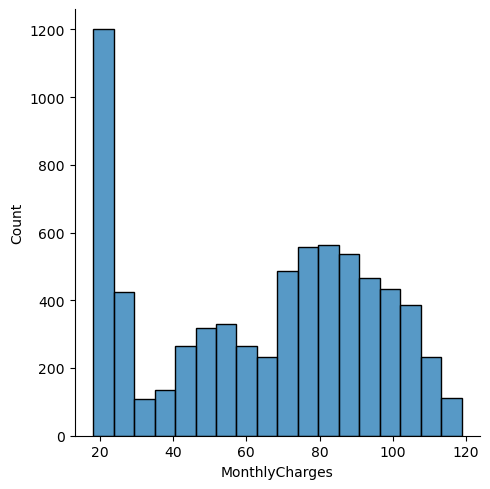

In [11]:
sns.displot(df.MonthlyCharges)

In [13]:
df.MonthlyCharges.median()

70.35

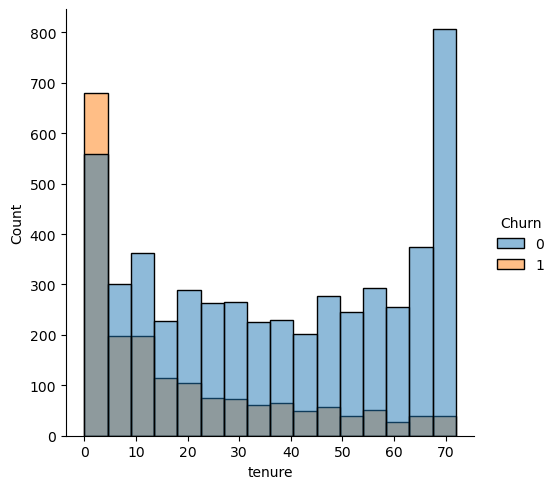

In [15]:
sns.displot(x=df.tenure, hue=df.Churn)

<AxesSubplot:xlabel='tenure'>

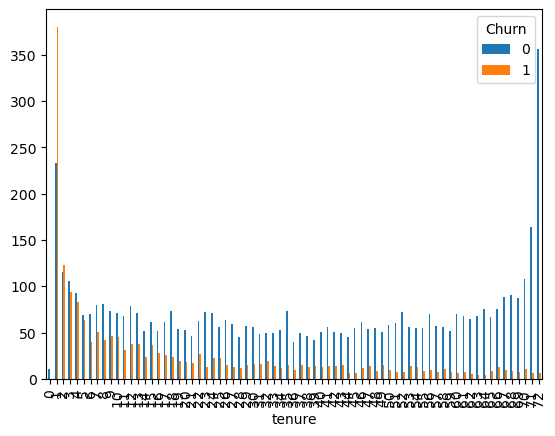

In [20]:
pd.crosstab(index=df.tenure, columns=df.Churn).plot(kind='bar')

# MultiVariate Analysis

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

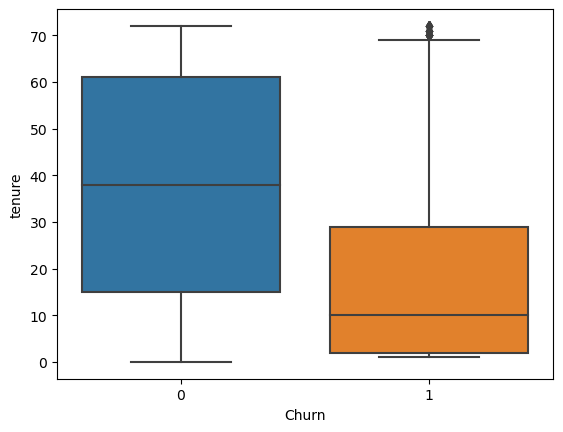

In [23]:
sns.boxplot( x= df.Churn,y= df.tenure)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

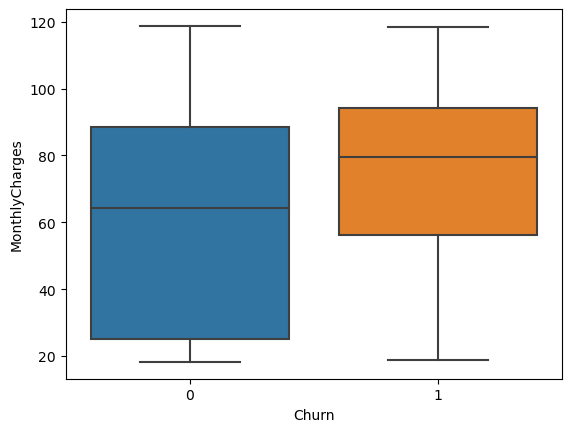

In [24]:
sns.boxplot( x= df.Churn,y= df.MonthlyCharges)

<AxesSubplot:xlabel='SeniorCitizen'>

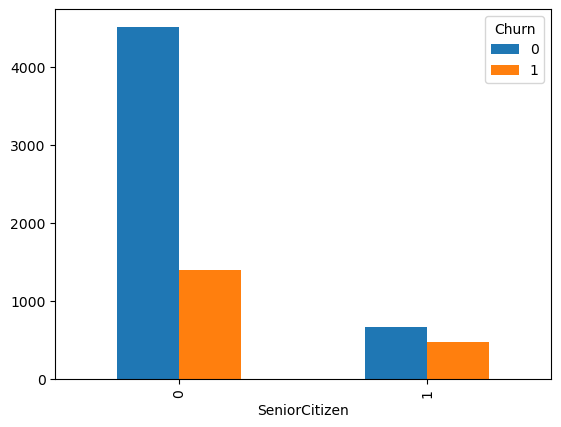

In [27]:
pd.crosstab(index= df.SeniorCitizen, columns=df.Churn).plot.bar()

In [28]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [29]:
# Contract -- Churn
# paperlessbilling -- Churn

In [31]:
X = df.drop(['Churn','TotalCharges', 'tenure'], axis=1)
y = df['Churn']

In [32]:
X_dummies = pd.get_dummies(X, drop_first=True)

In [33]:
# RandoomForest
train_X, test_X, train_y, test_y  =  train_test_split(X_dummies,y,test_size=0.3)

In [34]:
rf = RandomForestClassifier(class_weight={0:0.2,1:0.8})
rf.fit(train_X, train_y)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

In [35]:
rf.score(train_X, train_y)

0.9933062880324544

In [36]:
rf.score(test_X, test_y)

0.7463322290582111

In [37]:
print(classification_report(test_y, rf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1546
           1       0.54      0.40      0.46       567

    accuracy                           0.75      2113
   macro avg       0.67      0.64      0.65      2113
weighted avg       0.73      0.75      0.73      2113



In [38]:
rf.predict_proba(test_X)

array([[0.97862069, 0.02137931],
       [0.57      , 0.43      ],
       [0.27      , 0.73      ],
       ...,
       [1.        , 0.        ],
       [0.95862069, 0.04137931],
       [0.33      , 0.67      ]])

In [41]:
pred_y_prob = rf.predict_proba(test_X)[:,1]
precision, recall, thresh = precision_recall_curve(train_y, pred_y_prob)

ValueError: Found input variables with inconsistent numbers of samples: [4930, 2113]